In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import numpy as np
import matplotlib
import scipy
import sklearn
import skimage
import networkx
import sys

from face_recognition_hfs import *
from harmonic_function_solution import *
from helper import *
from helper_online_ssl import *
from online_ssl import *

## 1. Harmonic Function Solution (HSF)

### 1.1
The *hard_hfs* function as been completed so that $f_l$ is equal to $y_l$ the one-hot-encoded labels of the labeled points, and $f_u=-L_{uu}^{-1}L_{ul}f_l$ is the matrix of the probabilities of the labels for the unlabeled data. We keep the labelwith the highest probability

The parameters of the *two_moons_hfs* have been set to $var=1$ and $k=10$ so that we use a KNN Similarity graph. 
It also has been modified so it is easier to choose the data we want to work on.

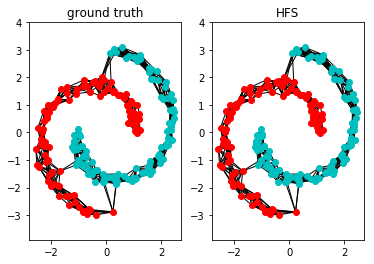

1.0

In [2]:
two_moons_hfs(dataset='data_2moons_hfs.mat')

### 1.2

We relaunched the function *two_moons_hfs* with the same parameters but the larger dataset.

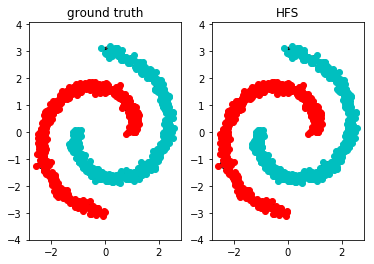

1.0

In [5]:
two_moons_hfs(dataset='data_2moons_hfs_large.mat')

What could go wrong : if by any chance the 4 points chosen randomly to be labeled are located in the same "moon", we would identify all the points with the same labels.

### 1.3

The *soft_hfs* dunction was completed so that $f=(C^{-1}L+I_n)^{-1}y$ : the $f_l$ are no longer necessarily equal to the $y_l$.

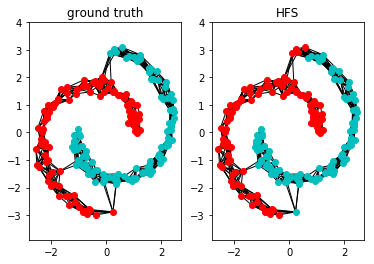

0.975

In [25]:
two_moons_hfs(dataset='data_2moons_hfs.mat')

Here the *soft_hfs* function was used with parameters $c_l=100$ and $c_u$=10. 

Since the "smoothness" is important thanks to the non-zero parameter $c_u$, we see that some points on the extremity of the blue moon are misclassified because they are considered similar to the close red ones (lot of edges between them).

c_l=1000 
c_u=0.001


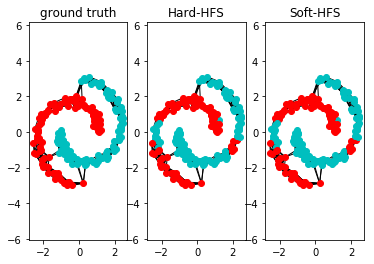

[0.885, 0.885]

In [48]:
hard_vs_soft_hfs()

We notice that for a really big coefficent $c_l$ compared to $c_u$, the *soft_hfs* is equivalent to the *hard_hfs*.

c_l=1 
c_u=10


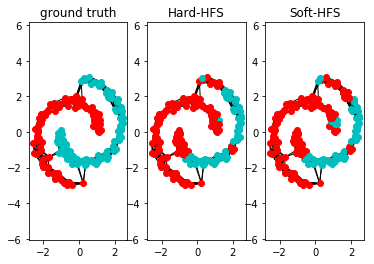

[0.8, 0.755]

In [55]:
hard_vs_soft_hfs()

The results are different when $c_u$ is not small compared to $c_l$ : it will modify the labels of neighbors to try to smooth them. 

## 2. Face recognition with HFS

The function *offline_face_recognition* has been modified :
- to choose easily which filter to apply.
We can pass a list of names of filters selected from 'GaussianBlur','boxFilter','bilateralFilter'. (Default is only 'GaussianBlur').
- to choose if we want to plot the results (default=True).
- to return the accuracy

Let's try different combinations multiple times, and average the accuracy.

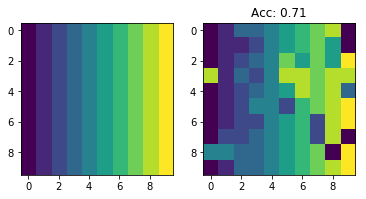

0.71

In [80]:
#Exemple of output
offline_face_recognition()

### 2.1 

The one-hot-encoding allow us to use more than 2 labels : the matrix of labels is of size $n$ x $num\_classes$ and for each line representing a node, we have only zeros excepet a $a$ in the column corresponding to its label.

### 2.2

I used an equalization of the histogram so that all details in all pictures are compared fairly.
Then I tried to add either cv.boxFilter, cv.GaussianBlur or cv.bilinearFilter.

In [84]:
## No filter except equalize
acc=[]
for i in range(10):
    acc.append(offline_face_recognition(filters=[],plot=False))
    
print('Average accuracy:',np.mean(acc))

Average accuracy: 0.7539999999999999


In [85]:
## Equalize + Gaussian Blur
acc=[]
for i in range(10):
    acc.append(offline_face_recognition(filters=['GaussianBlur'],plot=False))
    
print('Average accuracy:',np.mean(acc))

Average accuracy: 0.739


In [86]:
## Equalize + boxFilter (default depth)
acc=[]
for i in range(10):
    acc.append(offline_face_recognition(filters=['boxFilter'],plot=False))
    
print('Average accuracy:',np.mean(acc))

Average accuracy: 0.757


In [87]:
## Equalize + bilateralFilter
acc=[]
for i in range(10):
    acc.append(offline_face_recognition(filters=['bilateralFilter'],plot=False))
    
print('Average accuracy:',np.mean(acc))

Average accuracy: 0.75


In [88]:
## Equalize + Gaussian Blur + boxFilter
acc=[]
for i in range(10):
    acc.append(offline_face_recognition(filters=['boxFilter','GaussianBlur'],plot=False))
    
print('Average accuracy:',np.mean(acc))

Average accuracy: 0.738


In [89]:
## Equalize + Gaussian Blur + bilateralFilter
acc=[]
for i in range(10):
    acc.append(offline_face_recognition(filters=['bilateralFilter','GaussianBlur'],plot=False))
    
print('Average accuracy:',np.mean(acc))

Average accuracy: 0.746


The best one is with *box_filter* that we willkeep from now on.

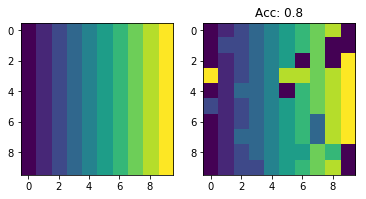

0.8

In [15]:
offline_face_recognition(filters=['boxFilter'])

### 2.3
Considering the fact that we already had 40% of labeled data, HFS is not super performing and might be impoved with more unlabeled data.

### 2.4 / 2.5
We modified the function *offline_face_recognition_augmented* so that it uses the equalization of the histogram and boxFilter as preprocessing.

It also takes the two folders of pictures as inputs by:
- setting the initial size of the *images* and *labels* vectors to $10 nbnimgs+ 100$ to take into account he initial dataset as well,
- loading the augmented dataset after the initial one, for that we added $+100$ in the index to store it after in *images* and *labels* (ex: **images[j * 10 + i +100] = gray_face.reshape((-1))**),
- modifying the option to *plot_the_dataset* by changing the range from $nbimgs$ to $nbimgs + 10$


We also added an option *labeled* that can be passed as input, taking the values *labeled*, *unlabeled* or *mixed*. The effect on the function are :
- if *labeled*, all of the data from the augmented dataset will be labeled
- if *unlabeled*, none of the data from the augmeneted dataset will be labeled
- if *mixed*, part of the data from the augmented dataset will be labeled, following the same proportion as for the initial data (keep the label for 4 out of 10)

(Default = 'unlabeled')

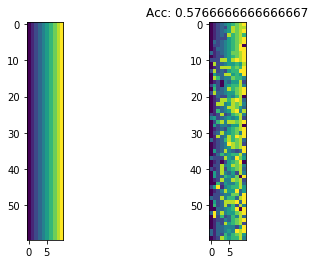

In [21]:
offline_face_recognition_augmented('unlabeled')

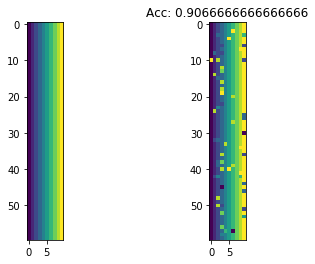

In [22]:
offline_face_recognition_augmented('mixed')

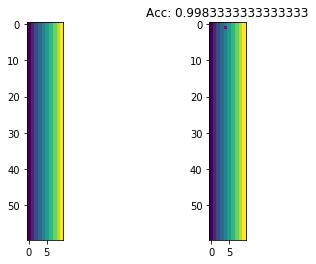

In [23]:
offline_face_recognition_augmented('labeled')

- The prediction is less performant ($1^{st}$ case) when we add unlabeled data. <br/>
- Its performance increases greatly when we have more data ($2^{nd}$ case) woth the same proportion of labeled/unlabeled nodes. <br/>
- It is quasi perfect when all the data we add is labeled ($3^{rd}$ case)

## 3. Online SSL



In [13]:
create_user_profile('Ariane')

Profile found with 10 images.
Image 11 saved at data/faces\Ariane\img_11.bmp
Image 12 saved at data/faces\Ariane\img_12.bmp
Image 13 saved at data/faces\Ariane\img_13.bmp
Image 14 saved at data/faces\Ariane\img_14.bmp
Image 15 saved at data/faces\Ariane\img_15.bmp
Image 16 saved at data/faces\Ariane\img_16.bmp
Image 17 saved at data/faces\Ariane\img_17.bmp
Image 18 saved at data/faces\Ariane\img_18.bmp
Image 19 saved at data/faces\Ariane\img_19.bmp
Image 20 saved at data/faces\Ariane\img_20.bmp
Image 21 saved at data/faces\Ariane\img_21.bmp
Image 22 saved at data/faces\Ariane\img_22.bmp
Image 23 saved at data/faces\Ariane\img_23.bmp
Image 24 saved at data/faces\Ariane\img_24.bmp
Image 25 saved at data/faces\Ariane\img_25.bmp
Image 26 saved at data/faces\Ariane\img_26.bmp
Image 27 saved at data/faces\Ariane\img_27.bmp


In [40]:
create_user_profile('Alex')

Profile found with 4 images.
Image 5 saved at data/faces\Alex\img_5.bmp
Image 6 saved at data/faces\Alex\img_6.bmp
Image 7 saved at data/faces\Alex\img_7.bmp
Image 8 saved at data/faces\Alex\img_8.bmp
Image 9 saved at data/faces\Alex\img_9.bmp
Image 10 saved at data/faces\Alex\img_10.bmp
Image 11 saved at data/faces\Alex\img_11.bmp
Image 12 saved at data/faces\Alex\img_12.bmp
Image 13 saved at data/faces\Alex\img_13.bmp
Image 14 saved at data/faces\Alex\img_14.bmp
Image 15 saved at data/faces\Alex\img_15.bmp
Image 16 saved at data/faces\Alex\img_16.bmp
Image 17 saved at data/faces\Alex\img_17.bmp
Image 18 saved at data/faces\Alex\img_18.bmp
Image 19 saved at data/faces\Alex\img_19.bmp


### 3.1

The function *online_ssl_update_centroids* has been completed, and is commented at each step to give an explanation on how the code was implemented.

### 3.2

The function *online_ssl_compute_solution* has been completed, and is commented at each step to give an explanation on how the code was implemented. <br/>
The regularization and normalization parameters have been chosen to be the same as in the offline face recognition, and $k$ has been set to $5$, which is close to the square root of the number of nodes ($20$), which is a classical choice.

The hard_hfs is computed with the same method as in the function *hard_hfs* from *harmonic_function_solution.py*.

### 3.3
We run *online_face_recognition*.

In [47]:
online_face_recognition(['Ariane','Antoine','Alex'],n_pictures=10)

Profile found with 25 images.
Profile found with 10 images.
Profile found with 19 images.
[s]ave a frame ?


#### Examples of results :
(The pictures on the phone are really of Antoine, except the last one)

<img align='left' src="data/results/3-3_Ariane.png",width=49%><img src="data/results/3-3_Ariane_2.png",width=49%><br/>
<img align='left' src="data/results/3-3_Antoine.png",width=49%><img src="data/results/3-3_Ariane_Alex.png",width=49%><br/>
<img align="left" src="data/results/3-3_Antoine_Ariane.png",width=49%><img src="data/results/3-3_Not_Ariane.png",width=49%>

### 3.4
We notice that for a new face, the algorithm starts by identifying it as the closest label with probability 1 (in our example, to 'Antoine' since it is a masculine face), and it progressively changes when seeing new instances of that new face. 

In [82]:
online_face_recognition(['Ariane','Antoine'],n_pictures=10)

Profile found with 25 images.
Profile found with 10 images.
[s]ave a frame ?


#### Examples of results :
We launched the function with the pictures of Ariane and Antoine only: the photo of someone else and the photo of Alex (third person with a set of pictures used in some examples of the previous question) are not recognized.

<img align='left' src="data/results/3-4_Unknown.png",width=49%><img src="data/results/3-4_Ariane_Alex.png",width=49%>